## 问题5数学建模过程

### 1. 问题描述

如果饲料加工厂允许部分加工窖不生产，但必须完成整个加工任务。请建立数学模型，给出混合加工方案，使得（1）饲料质量尽量高，（2）加工成本尽量低，（3）平均能耗率超过80%的加工包尽量多。

### 2. 数学模型

#### 变量定义

- **$x_{ij}$**：原料 $i$ 分配到加工窖 $j$ 的重量，其中 $i \in \{1, 2, \ldots, 16\}$，$j \in \{1, 2, \ldots, 9\}$。
- **$y_j$**：加工窖 $j$ 是否被使用，$y_j \in \{0, 1\}$，其中 $j \in \{1, 2, \ldots, 9\}$。
- **$z_j$**：加工窖 $j$ 的平均能耗率是否超过80%，$z_j \in \{0, 1\}$，其中 $j \in \{1, 2, \ldots, 9\}$。
- **$e_i$**：原料 $i$ 的能耗率。
- **$a_{ij}$**：原料 $i$ 和原料 $j$ 之间的亲缘值。

#### 亲缘值的计算

亲缘值 **$a_{ij}$** 定义为原料 $i$ 和原料 $j$ 基因序列中相同位点的数量：

$$
a_{ij} = \sum_{k=1}^{10} \delta(g_i^k, g_j^k)
$$

其中，**$g_i^k$** 表示原料 $i$ 的第 $k$ 个基因位点，**$\delta(g_i^k, g_j^k)$** 为指示函数：

$$
\delta(g_i^k, g_j^k) = \begin{cases} 
1, & \text{if } g_i^k = g_j^k \\
0, & \text{if } g_i^k \ne g_j^k 
\end{cases}
$$

#### 目标函数

最小化总加工成本，同时最大化饲料质量（亲缘度）和能耗率超过80%的加工包数量。

目标函数表示为：

$$
\text{Minimize} \sum_{j=1}^{9} \left( C_j^{\text{fixed}} y_j + C_j^{\text{variable}} \sum_{i=1}^{16} x_{ij} \right) - \sum_{j=1}^{9} z_j - \sum_{j=1}^{9} \frac{\sum_{i=1}^{16} \sum_{k=i+1}^{16} a_{ik} x_{ij} x_{kj}}{\sum_{i=1}^{16} x_{ij}}
$$

其中，$C_j^{\text{fixed}}$ 是加工窖 $j$ 的固定成本，$C_j^{\text{variable}}$ 是加工窖 $j$ 的可变成本。

#### 约束条件

1. **每种原料必须分配到一个加工窖中**：

$$
\sum_{j=1}^{9} x_{ij} = w_i \quad \forall i \in \{1, 2, \ldots, 16\}
$$

其中，$w_i$ 表示原料 $i$ 的总重量。

2. **每个加工窖的重量必须在限定范围内（仅当加工窖被使用时）**：

$$
S_j^{\min} y_j \leq \sum_{i=1}^{16} x_{ij} \leq S_j^{\max} y_j \quad \forall j \in \{1, 2, \ldots, 9\}
$$

其中，$S_j^{\min}$ 和 $S_j^{\max}$ 分别为加工窖 $j$ 的最小和最大重量。

3. **辅助变量 $z_j$ 的约束，用于判断加工包的平均能耗率是否超过80%**：

$$
\sum_{i=1}^{16} x_{ij} e_i \geq 0.80 \sum_{i=1}^{16} x_{ij} - M (1 - z_j) \quad \forall j \in \{1, 2, \ldots, 9\}
$$

$$
\sum_{i=1}^{16} x_{ij} e_i \leq 0.80 \sum_{i=1}^{16} x_{ij} + M z_j \quad \forall j \in \{1, 2, \ldots, 9\}
$$

其中，$e_i$ 为原料 $i$ 的能耗率，$M$ 是一个足够大的常数。

4. **如果加工窖不被使用，其能耗率变量 $z_j$ 也必须为0**：

$$
z_j \leq y_j \quad \forall j \in \{1, 2, \ldots, 9\}
$$

5. **亲缘度约束，使用辅助变量**：

$$
\text{Affinity}_j = \sum_{i=1}^{16} \sum_{k=i+1}^{16} a_{ik} (x_{ij} + x_{kj} - 1) \quad \forall j \in \{1, 2, \ldots, 9\}
$$

### 3. 数学表达式详解

1. **变量定义**：
    - $x_{ij}$ 表示原料 $i$ 分配到加工窖 $j$ 的重量。
    - $y_j$ 表示加工窖 $j$ 是否被使用。
    - $z_j$ 表示加工窖 $j$ 的平均能耗率是否超过80%。
    - $e_i$ 表示原料 $i$ 的能耗率。
    - $a_{ij}$ 表示原料 $i$ 和原料 $j$ 之间的亲缘值。
    - $w_i$ 表示原料 $i$ 的总重量。

2. **目标函数**：
    - 最小化总加工成本，同时最大化饲料质量（亲缘度）和能耗率超过80%的加工包数量：
      $$
      \text{Minimize} \sum_{j=1}^{9} \left( C_j^{\text{fixed}} y_j + C_j^{\text{variable}} \sum_{i=1}^{16} x_{ij} \right) - \sum_{j=1}^{9} z_j - \sum_{j=1}^{9} \frac{\sum_{i=1}^{16} \sum_{k=i+1}^{16} a_{ik} x_{ij} x_{kj}}{\sum_{i=1}^{16} x_{ij}}
      $$

3. **约束条件**：
    - 每种原料必须分配到一个加工窖中：
      $$
      \sum_{j=1}^{9} x_{ij} = w_i \quad \forall i \in \{1, 2, \ldots, 16\}
      $$
    - 每个加工窖的重量必须在限定范围内（仅当加工窖被使用时）：
      $$
      S_j^{\min} y_j \leq \sum_{i=1}^{16} x_{ij} \leq S_j^{\max} y_j \quad \forall j
      $$
    - 判断加工包的平均能耗率是否超过80%：
      $$
      \sum_{i=1}^{16} x_{ij} e_i \geq 0.80 \sum_{i=1}^{16} x_{ij} - M (1 - z_j) \quad \forall j
      $$
      $$
      \sum_{i=1}^{16} x_{ij} e_i \leq 0.80 \sum_{i=1}^{16} x_{ij} + M z_j \quad \forall j
      $$
    - 如果加工窖不被使用，其能耗率变量 $z_j$ 也必须为0：
      $$
      z_j \leq y_j \quad \forall j
      $$
    - 亲缘度约束，使用辅助变量：
      $$
      \text{Affinity}_j = \sum_{i=1}^{16} \sum_{k=i+1}^{16} a_{ik} (x_{ij} + x_{kj} - 1) \quad \forall j
      $$

In [1]:
import numpy as np
import pandas as pd
import pulp
from matplotlib.font_manager import FontProperties
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*Glyph.*")


In [2]:


# 原料数据
raw_data = {
    '品种代码': list(range(1, 17)),
    '总重量千克': [300, 500, 200, 500, 300, 400, 300, 300, 400, 600, 100, 600, 500, 400, 300, 300],
    '效能率': [0.88, 0.60, 0.93, 0.90, 0.90, 0.78, 0.70, 0.83, 0.95, 0.87, 0.65, 0.75, 0.80, 0.68, 0.87, 0.83],
    '位点基因序列': [
        ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
        ['a', 'b', 'c', 'd', 'e', 'o', 'p', 'k', 'l', 'm'],
        ['f', 'g', 'h', 'a', 'j', 'o', 'p', 'k', 'l', 'm'],
        ['f', 'g', 'h', 'i', 'j', 'l', 'p', 'f', 'o', 'p'],
        ['f', 'b', 'h', 'd', 'e', 'o', 'p', 'a', 'o', 'z'],
        ['r', 'm', 't', 'u', 'q', 'f', 'g', 'a', 'f', 'z'],
        ['r', 's', 't', 'u', 'k', 'f', 'g', 'h', 'f', 'c'],
        ['r', 's', 't', 'u', 'a', 'b', 'h', 'i', 'j', 'c'],
        ['c', 's', 'a', 'f', 'v', 'w', 'a', 'i', 'j', 'c'],
        ['b', 'm', 'n', 'i', 'a', 'z', 'h', 'f', 'o', 'z'],
        ['m', 'a', 'm', 'e', 'a', 'z', 'a', 'b', 'a', 'b'],
        ['m', 'c', 'm', 'e', 'x', 'h', 'a', 'b', 'n', 'a'],
        ['b', 'a', 'n', 'y', 'c', 'g', 'm', 'b', 'm', 'b'],
        ['m', 'c', 'm', 'y', 'x', 'g', 'm', 'b', 'n', 'b'],
        ['b', 'x', 'n', 'i', 'c', 'l', 'b', 'c', 'm', 'p'],
        ['c', 'c', 'a', 'f', 'x', 'h', 'b', 'c', 'm', 'j']
    ]
}

weights = raw_data['总重量千克']
efficiency = raw_data['效能率']
genes = raw_data['位点基因序列']

# 加工窖信息
silos = [
    {"id": 1, "min_weight": 300, "max_weight": 600, "fixed_cost": 400, "variable_cost": 2},
    {"id": 2, "min_weight": 300, "max_weight": 600, "fixed_cost": 400, "variable_cost": 2},
    {"id": 3, "min_weight": 300, "max_weight": 600, "fixed_cost": 400, "variable_cost": 2},
    {"id": 4, "min_weight": 600, "max_weight": 900, "fixed_cost": 500, "variable_cost": 1.8},
    {"id": 5, "min_weight": 600, "max_weight": 900, "fixed_cost": 500, "variable_cost": 1.8},
    {"id": 6, "min_weight": 600, "max_weight": 900, "fixed_cost": 500, "variable_cost": 1.8},
    {"id": 7, "min_weight": 900, "max_weight": 1200, "fixed_cost": 600, "variable_cost": 1.6},
    {"id": 8, "min_weight": 900, "max_weight": 1200, "fixed_cost": 600, "variable_cost": 1.6},
    {"id": 9, "min_weight": 900, "max_weight": 1200, "fixed_cost": 600, "variable_cost": 1.6}
]

# 计算亲缘值
def calculate_affinity(genome1, genome2):
    return sum(g1 == g2 for g1, g2 in zip(genome1, genome2))

# 创建亲缘值矩阵
affinity_matrix = np.zeros((16, 16))
for i in range(16):
    for j in range(i + 1, 16):
        affinity_matrix[i, j] = calculate_affinity(genes[i], genes[j])
        affinity_matrix[j, i] = affinity_matrix[i, j]

In [3]:
# 创建优化问题
prob = pulp.LpProblem("Minimize_Cost_And_Maximize_Quality", pulp.LpMinimize)

# 决策变量
x = pulp.LpVariable.dicts("x", ((i, j) for i in range(1, 17) for j in range(1, 10)), cat='Continuous', lowBound=0)
y = pulp.LpVariable.dicts("y", (j for j in range(1, 10)), cat='Binary')  # 表示加工窖是否被使用
z = pulp.LpVariable.dicts("z", (j for j in range(1, 10)), cat='Binary')  # 表示能耗率是否超过80%

# 定义大M
M = 1000000

# 目标函数：最小化总加工成本，同时最大化饲料质量（亲缘度）和能耗率超过80%的加工包数量
cost_term = pulp.lpSum(silos[j-1]["fixed_cost"] * y[j] + silos[j-1]["variable_cost"] * pulp.lpSum(x[i, j] for i in range(1, 17)) for j in range(1, 10))
efficiency_term = -pulp.lpSum(z[j] for j in range(1, 10))

prob += cost_term + efficiency_term

# 约束条件
# 1. 每种原料必须分配到一个加工窖中
for i in range(1, 17):
    prob += pulp.lpSum(x[i, j] for j in range(1, 10)) == weights[i-1]

# 2. 每个加工窖的重量必须在限定范围内（仅当加工窖被使用时）
for j in range(1, 10):
    prob += pulp.lpSum(x[i, j] for i in range(1, 17)) <= silos[j-1]["max_weight"] * y[j]
    prob += pulp.lpSum(x[i, j] for i in range(1, 17)) >= silos[j-1]["min_weight"] * y[j]

# 3. 辅助变量z[j]的约束，用于判断加工包的平均能耗率是否超过80%
for j in range(1, 10):
    prob += pulp.lpSum(x[i, j] * efficiency[i-1] for i in range(1, 17)) - 0.80 * pulp.lpSum(x[i, j] for i in range(1, 17)) >= -M * (1 - z[j])
    prob += pulp.lpSum(x[i, j] * efficiency[i-1] for i in range(1, 17)) - 0.80 * pulp.lpSum(x[i, j] for i in range(1, 17)) <= M * z[j]

# 4. 如果加工窖不被使用，其能耗率变量z[j]也必须为0
for j in range(1, 10):
    prob += z[j] <= y[j]

# 5. 亲缘度约束，使用辅助变量
affinity_variables = {}
affinity_matrix_flat = affinity_matrix.flatten()
affinity_pairs = [(i, k) for i in range(16) for k in range(i + 1, 16)]

for j in range(1, 10):
    affinity_variables[j] = pulp.LpVariable(f"affinity_{j}", lowBound=0)
    prob += affinity_variables[j] == pulp.lpSum(affinity_matrix[i][k] * (x[i + 1, j] + x[k + 1, j] - 1) for i, k in affinity_pairs)

# 求解问题
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/yooky/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/ng/h1_4zcsj2qq895j6xpxvjyqh0000gn/T/f5cb428fd5534025ae19dc966a7723ae-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/ng/h1_4zcsj2qq895j6xpxvjyqh0000gn/T/f5cb428fd5534025ae19dc966a7723ae-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 75 COLUMNS
At line 1201 RHS
At line 1272 BOUNDS
At line 1291 ENDATA
Problem MODEL has 70 rows, 171 columns and 909 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 13213.3 - 0.00 seconds
Cgl0003I 9 fixed, 0 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 43 rows, 153 columns (9 integer (9 of which binary)) and 576 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found o

1

In [4]:
# 输出结果
solution = np.zeros((16, 9))
efficiency_results = []
affinity_results = []
used_silos = []

for j in range(1, 10):
    if pulp.value(y[j]) == 1:
        used_silos.append(j)
    silo_weight = sum(pulp.value(x[i, j]) for i in range(1, 17))
    if silo_weight > 0:
        silo_efficiency = sum(pulp.value(x[i, j]) * efficiency[i-1] for i in range(1, 17)) / silo_weight
    else:
        silo_efficiency = 0
    efficiency_results.append(silo_efficiency)
    affinity_results.append(pulp.value(affinity_variables[j]))
    for i in range(1, 17):
        solution[i-1, j-1] = pulp.value(x[i, j])

In [5]:
# 生成表5
table5_weights = pd.DataFrame(solution, columns=[f"加工窖{j}" for j in range(1, 10)], index=[f"原料{i}" for i in range(1, 17)])
table5_efficiency = pd.DataFrame(efficiency_results, columns=["能耗率"], index=[f"加工窖{j}" for j in range(1, 10)])
table5_affinity = pd.DataFrame(affinity_results, columns=["亲缘度"], index=[f"加工窖{j}" for j in range(1, 10)])
table5 = pd.concat([table5_weights, table5_efficiency.T, table5_affinity.T], axis=0)

# 保留两位小数
table5 = table5.applymap(lambda x: f"{x:.2f}")

# 保存结果并显示
table5.T.to_csv('问题5结果.csv', index_label='加工窖')

# 打印结果
print("表5 问题5的结果（每个加工窖所含每种加工原料的重量，千克）")
print(table5.T)

表5 问题5的结果（每个加工窖所含每种加工原料的重量，千克）
         原料1     原料2     原料3     原料4     原料5     原料6     原料7     原料8     原料9  \
加工窖1    0.00    0.00   60.61    0.00    0.00    0.00    0.00    0.00    0.00   
加工窖2    0.00   90.37    0.00    0.00  113.33    0.00    0.00    0.00    0.00   
加工窖3    0.00    0.00    0.00    0.00    0.00  233.33    0.00    0.00    0.00   
加工窖4    0.00    0.00    0.00    0.00  186.67    0.00  280.00    0.00    0.00   
加工窖5    0.00    0.00    0.00  100.00    0.00    0.00    0.00    0.00    0.00   
加工窖6  300.00  143.48    0.00    0.00    0.00    0.00    0.00   95.92    0.00   
加工窖7    0.00   23.57  139.39  400.00    0.00    0.00    0.00    0.00    0.00   
加工窖8    0.00  242.58    0.00    0.00    0.00    0.00    0.00  204.08  400.00   
加工窖9    0.00    0.00    0.00    0.00    0.00  166.67   20.00    0.00    0.00   

        原料10    原料11    原料12    原料13    原料14    原料15    原料16   能耗率       亲缘度  
加工窖1    0.00    0.00    0.00    0.00    0.00    0.00  239.39  0.85   3838.61  
加工窖2    0.

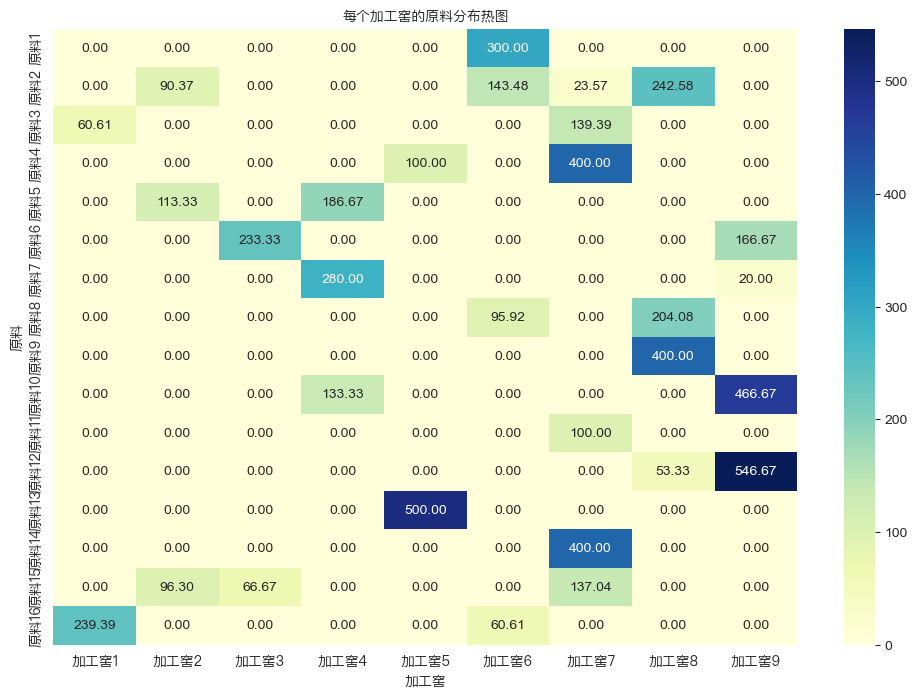

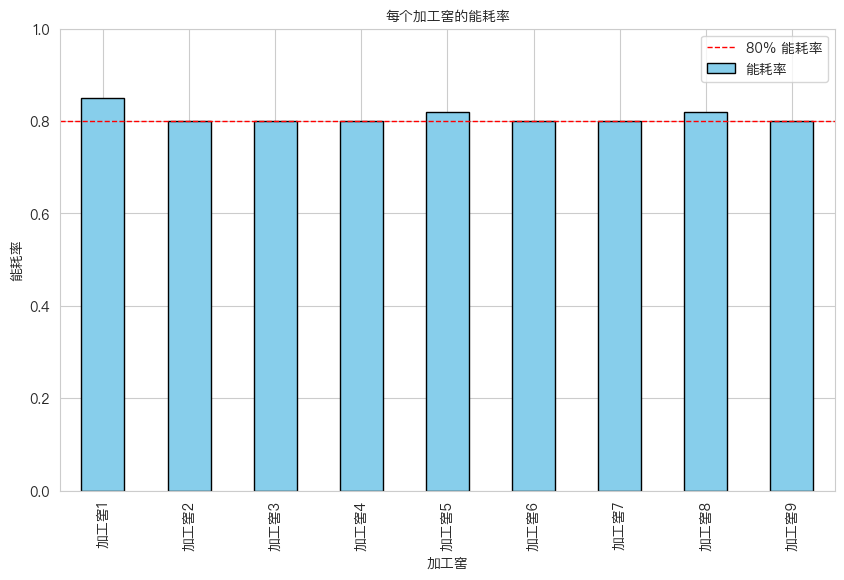

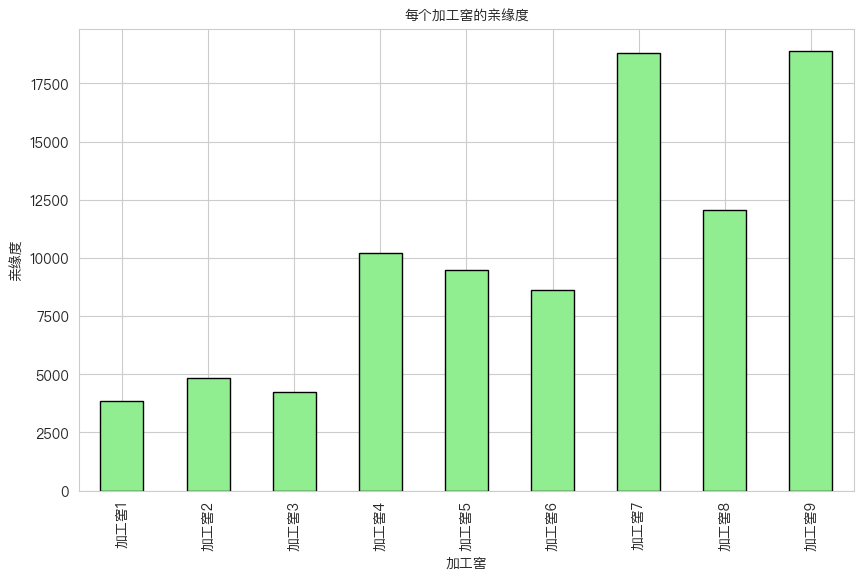

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# 设置中文字体
font_path = '/System/Library/Fonts/PingFang.ttc'
my_font = FontProperties(fname=font_path)

results = pd.read_csv('问题5结果.csv', index_col='加工窖')

# 将原料重量部分和能耗率、亲缘度部分分开
weights = results.drop(columns=["能耗率", "亲缘度"])
efficiencies = results["能耗率"]
affinities = results["亲缘度"]

# 绘制每个加工窖的原料分布热图
plt.figure(figsize=(12, 8))
sns.heatmap(weights.T, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title('每个加工窖的原料分布热图', fontproperties=my_font)
plt.xlabel('加工窖', fontproperties=my_font)
plt.ylabel('原料', fontproperties=my_font)
plt.xticks(fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.show()

# 绘制每个加工窖的能耗率条形图
plt.figure(figsize=(10, 6))
efficiencies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.axhline(y=0.80, color='red', linestyle='--', linewidth=1, label='80% 能耗率')
plt.title('每个加工窖的能耗率', fontproperties=my_font)
plt.xlabel('加工窖', fontproperties=my_font)
plt.ylabel('能耗率', fontproperties=my_font)
plt.xticks(fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.ylim(0, 1)
plt.legend(prop=my_font)
plt.show()

# 绘制每个加工窖的亲缘度条形图
plt.figure(figsize=(10, 6))
affinities.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('每个加工窖的亲缘度', fontproperties=my_font)
plt.xlabel('加工窖', fontproperties=my_font)
plt.ylabel('亲缘度', fontproperties=my_font)
plt.xticks(fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.show()